## Linear regression with one variable
In this part of this exercise, you will implement linear regression with one variable to
predict profits for a bakery franchise.
Suppose you are the Chief Executive Officer of a bakery and are considering different
cities for opening a new outlet. The chain already has outlets in various cities and you
have data for profits and populations from the cities. You would like to use this data to
help you select which city to expand to next.
The file exldatal .txt contains the dataset for our linear regression problem. The first
column is the population of a city and the second column is the profit of an outlet in
that city. A negative value for profit indicates a loss.
## Plotting the Data
Before starting on any task, it is often useful to understand the data by visualizing it.
For this dataset, you can use a scatter plot to visualize the data, since it has only two
properties to plot (profit and population). (Many other problems that you will encounter
in real life are multi-dimensional and can't be plotted on a 2-d plot.)

**Find the intercept and slope using the linear regression
formula. You should implement logic from scratch. No library
for regression should be used.**

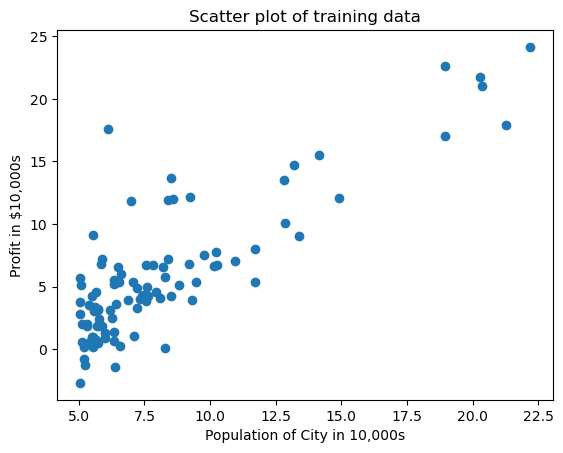

In [50]:
# read data
import pandas as pd
# handle numbers
import numpy as np
import matplotlib.pyplot as plt

# text file with comma-separated values, but no header
df = pd.read_csv('ex1data1.txt', header=None, sep=',')
# The first column is the population of a city and the second column is the profit of an outlet in
# that city. A negative value for profit indicates a loss.

df.columns = ['population', 'profit']

# plot data
plt.scatter(df['population'], df['profit'])
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Scatter plot of training data')
plt.show()


In [51]:
#Main function to find the coefficients of Line:
def simple_linear_regression(input_feature,output):
    
    Xi = input_feature
    Yi = output
    
    #Total number of data points:
    n = len(Xi)
    
    #X bar:
    Xi_mean = Xi.mean()
    
    #Y bar:
    Yi_mean = Yi.mean()
    
    #Sum of X:
    S_Xi = (Xi).sum()
    
    #Sum of Y:
    S_Yi = (Yi).sum()
    
    #Sum of (X*Y) multiplied by n:
    S_XiYi = ((Xi*Yi).sum())*n
    
    #Sum of X*Sum of Y:
    S_Xi_S_Yi = S_Xi*S_Yi
    
    #Sum of (X*X) multiplied by n:
    S_XiXi = ((Xi*Xi).sum())*n
    
    #Square of sum of X:
    S_Xi_Square = S_Xi*S_Xi
    
    #SLope:
    slope = (S_XiYi- S_Xi_S_Yi) / (S_XiXi-S_Xi_Square)
    
    #Intercept:
    intercept = Yi_mean - slope * Xi_mean
    
    return slope, intercept

ran = int(len(df)*0.8)
train = df[:ran]
test = df[ran:]

actual_slope, actual_intercept = simple_linear_regression(df.population.values.reshape(-1,1),
                                                          df.profit.values.reshape(-1,1))

print("Actual Intercept: ",actual_intercept)
print("Actual Slope: ",actual_slope)

Actual Intercept:  -3.8957808783118573
Actual Slope:  1.1930336441895943


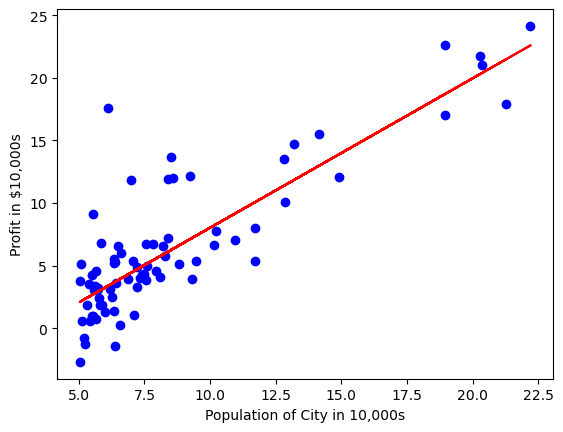

In [52]:
# plot the linear regression line
plt.scatter(train.population, train.profit, c='blue')
plt.plot(np.array(train.population), actual_slope*np.array(train.population) + actual_intercept, color='red')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()


Linear regression with multiple variables
In this part, you will implement linear regression with multiple variables to predict the
prices of houses. Suppose you are selling your house and you want to know what a
good market price would be. One way to do this is to first collect information on recent
houses sold and make a model of housing prices.
The file ex1data2.txt contains a training set of housing prices in a city. The first column
is the size of the house (in square feet), the second column is the number of bedrooms,
and the third column is the price of the house.

We know that the closed-form solution to linear regression is


$$\theta = (X^TX)^{-1}X^Ty$$

don't need to scale your features, we still need to add a columns of 1's to the X matrix
to have an intercept term (θ).
Now, once you have found θ using this method, use it to make a price prediction for a
1650-square-foot house with 3 bedrooms. You should find that gives the same
predicted price as the value you obtained using the model fit with gradient descent.

In [53]:
# text file with comma-separated values, but no header
df2 = pd.read_csv('ex1data2.txt', sep=',', header=None)
# The first column is the size of the house (in square feet), the second column is the number of bedrooms,
# and the third column is the price of the house.
df2.columns = ['house_size', 'bedrooms', 'house_price']
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
house_size,47.0,2000.680851,794.702354,852.0,1432.0,1888.0,2269.0,4478.0
bedrooms,47.0,3.170213,0.760982,1.0,3.0,3.0,4.0,5.0
house_price,47.0,340412.680851,125039.934269,169900.0,249900.0,299900.0,384450.0,699900.0


In [54]:
# m = number of training examples
m = df2.shape[0]
# X as a matrix, where the first column is all ones
X = np.hstack((np.ones((m,1)),df2.house_size.values.reshape(-1,1)))
y = np.array(df2.house_price.values).reshape(-1,1)
theta = np.zeros(shape=(X.shape[1],1))

def normal_eqn(X,y):
    """A closed-form solution to find without iteration."""
    inv = np.linalg.pinv(X.T.dot(X))
    theta = inv.dot(X.T).dot(y)
    return theta

# X as a matrix, where the first column is all ones
Xe = np.hstack((np.ones((m,1)),df2[['house_size', 'bedrooms']].values))
theta_e = normal_eqn(Xe, y)
theta_e

array([[89597.8282832 ],
       [  139.2106998 ],
       [-8738.00303723]])

In [55]:
# the formula of Multiple Linear Regression, where x is a vector of features, 
# and theta is a vector of coefficients learned during training
# 1650 square feet as X and 3 bedrooms as Y
y_pred = theta_e[0] + theta_e[1]*1650 + theta_e[2]*3
f'Price of a house with 1650 square feet and 3 bedrooms: {y_pred[0]}$'

'Price of a house with 1650 square feet and 3 bedrooms: 293081.47383528703$'

**Bitcoin price forecasting**
Using the data coin_Bitcoin.csv

1- Create a target column by averaging the low + high. Drop only
open, close columns. Because all
of them are contributions to a same value while all other columns
are to be treated as features
or inputs.

2- Apply Linear Regression and find the error both mean absolute
and mean squared error.

3- Before applying machine learning divide the data into training
and testing part with 70-30 aspect ratio. You can use scikit-learn
library for this.

4- Draw the linear regression line estimated by Model.

**5- Implement the linear regression model from scratch by
yourself. Find mean absolute and mean squared error by
yourself. No libraries should be used for both these
purposes.**

In [56]:
# load coin_Bitcoin.xlsx
df = pd.read_excel('coin_Bitcoin.xlsx')
df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [57]:
# 1- Create a target column by averaging the low + high.
df['target'] = (df['Low'] + df['High']) / 2

# Drop only open, close columns.
df = df.drop(['Open', 'Close','Name',  'Symbol'], axis=1)

# Convert the date column to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Convert the date to long format
df["Date"] = df["Date"].astype("int64")

# Print the preprocessed data
df.head()


,SNo,Date,High,Low,Volume,Marketcap,target
0,1,1367279999000000000,147.488007,134.000000,0.0,1.603769e+09,140.744003
1,2,1367366399000000000,146.929993,134.050003,0.0,1.542813e+09,140.489998
2,3,1367452799000000000,139.889999,107.720001,0.0,1.298955e+09,123.805000
3,4,1367539199000000000,125.599998,92.281898,0.0,1.168517e+09,108.940948
4,5,1367625599000000000,108.127998,79.099998,0.0,1.085995e+09,93.613998


In [58]:
# Normalize the 'Date' column
date_mean = df['Date'].mean()
date_std = df['Date'].std()
df['Date'] = (df['Date'] - date_mean) / date_std

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets with a 70-30 ratio
X_train, X_test, y_train, y_test = train_test_split(df.drop(['target'], axis=1), df['target'], test_size=0.3, random_state=42)

# Implement multiple linear regression with the closed-form solution
m = X_train.shape[0]  # Get the number of rows in X_train
X = np.hstack((np.ones((m,1)), X_train.values))
y = np.array(y_train.values).reshape(-1,1)
theta = np.zeros(shape=(X.shape[1],1))

def normal_eqn(X,y):
    """A closed-form solution to find without iteration."""
    inv = np.linalg.pinv(X.T.dot(X))
    theta = inv.dot(X.T).dot(y)
    return theta

# X as a matrix, where the first column is all ones
Xe = np.hstack((np.ones((m,1)), X_train[['Date']].values))
theta_e = normal_eqn(Xe, y)

# Print the learned coefficients
print("Learned coefficients: ", theta_e)

# Calculate the predicted values for the test set Z = X - mean / std
X_test_mean = X_test['Date'].mean()
X_test_std = X_test['Date'].std()
X_test_norm = (X_test['Date'] - X_test_mean) / X_test_std
X_test_norm = np.hstack((np.ones((X_test_norm.shape[0],1)), X_test_norm.values.reshape(-1,1)))
y_pred = np.dot(X_test_norm, theta_e)

# Calculate Mean Absolute Error (MAE)
# formula: sum(abs(yi - yhat)) / len(y_test)
mae = sum(abs(yi - yhat) for yi, yhat in zip(y_test, y_pred)) / len(y_test)

# Calculate Mean Squared Error (MSE)
# sum((yi - yhat)**2) / len(y_test)
mse = sum((yi - yhat)**2 for yi, yhat in zip(y_test, y_pred)) / len(y_test)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")


Learned coefficients:  [[6679.1102781 ]
 [7648.37811024]]
Mean Absolute Error: [5317.84362889]
Mean Squared Error: [65383081.91485064]


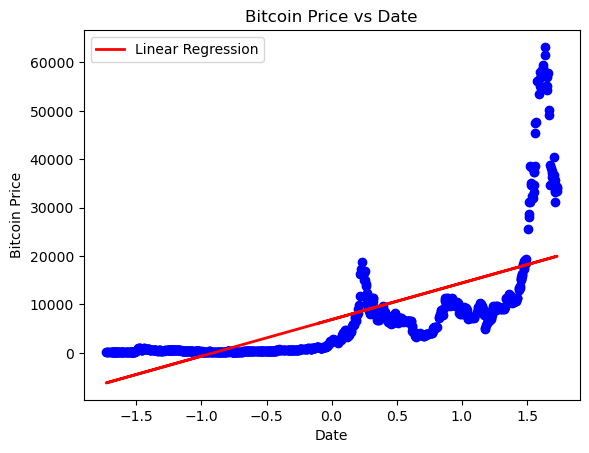

In [59]:

# plot the linear regression line
plt.scatter(X_test['Date'], y_test, c='blue')
plt.plot(X_test['Date'], y_pred, color='red', label='Linear Regression', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Bitcoin Price')
plt.title('Bitcoin Price vs Date')
plt.legend()
plt.show()
